<a href="https://colab.research.google.com/github/mimiachiu/Deep-Learning-with-Python-Book/blob/master/Ch03_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
pip install keras

In [3]:
from keras.datasets import reuters #從keras匯入路透社數位新聞專欄資料集
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000) #載入資料並分成訓練和測試，reuters已有建立好的字典並按照常用度排列，num_words參數是指載入最常用的單字個數

Using TensorFlow backend.


2113536/2110848 [==============================] - 0s 0us/step


In [4]:
train_data #和imdb一樣，有兩層list，內層的每個list代表一則評論，裡面的數字對應到的是字典裡的編號

array([list([1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]),
       list([1, 3267, 699, 3434, 2295, 56, 2, 7511, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 2, 49, 2295, 2, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 2, 2, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12]),
       list([1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 3886, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 1013, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186, 90, 67, 960, 4, 78, 13, 68, 467, 511, 110,

In [5]:
train_labels #和imdb不一樣的是，目標分類共有46個類別，因此標籤的數字是0~45

array([ 3,  4,  3, ..., 25,  3, 25])

In [6]:
import numpy as np
#把資料轉換成One-hot編碼
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [7]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [8]:
from tensorflow.keras.utils import to_categorical
#把標籤轉換成One-hot編碼
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [9]:
from tensorflow.keras import models
from tensorflow.keras import layers
#建立模型，imdb的範例使用了16個隱藏層，但16維空間可能太有限，無法學會區分46個類別，因此改用64個隱藏層，最後輸出層為46
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [10]:
#這邊使用的損失函數為categorical_crossentropy適用於多類別分類問題
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
#設定驗證資料集與訓練資料集
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [12]:
#開始訓練
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=9,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 147us/sample - loss: 2.8254 - acc: 0.5120 - val_loss: 1.8725 - val_acc: 0.6190
Epoch 2/9
7982/7982 [==============================] - 1s 110us/sample - loss: 1.5214 - acc: 0.6966 - val_loss: 1.3500 - val_acc: 0.7050
Epoch 3/9
7982/7982 [==============================] - 1s 113us/sample - loss: 1.0987 - acc: 0.7719 - val_loss: 1.1759 - val_acc: 0.7310
Epoch 4/9
7982/7982 [==============================] - 1s 113us/sample - loss: 0.8636 - acc: 0.8171 - val_loss: 1.0530 - val_acc: 0.7780
Epoch 5/9
7982/7982 [==============================] - 1s 109us/sample - loss: 0.6921 - acc: 0.8544 - val_loss: 0.9827 - val_acc: 0.7920
Epoch 6/9
7982/7982 [==============================] - 1s 109us/sample - loss: 0.5607 - acc: 0.8811 - val_loss: 0.9646 - val_acc: 0.7950
Epoch 7/9
7982/7982 [==============================] - 1s 110us/sample - loss: 0.4540 - acc: 0.9068 - val_loss: 0.9246 - val_acc: 

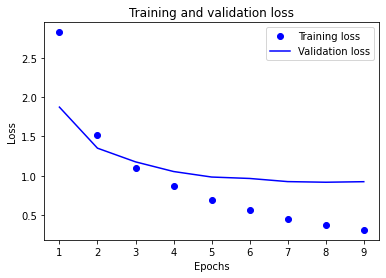

In [13]:
#繪製訓練與驗證的損失分數
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

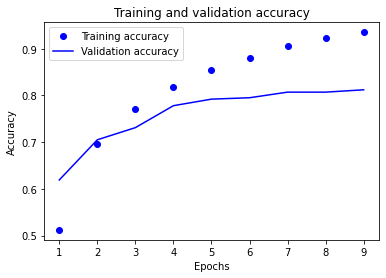

In [14]:
#繪製訓練與驗證的準確度
plt.clf()

acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [15]:
#將測試資料丟入訓練好的模型進行評估，得到損失分數和準確度
results = model.evaluate(x_test, one_hot_test_labels)
results

2246/2246 [==============================] - 0s 92us/sample - loss: 0.9842 - acc: 0.7792


[0.9842055841736356, 0.77916294]